In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE, chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [6]:
data=pd.read_csv("adult.data.csv")

In [10]:
df=pd.DataFrame(data)
df.head()

,Age,Work Class,fnlwgt,Education,Education num,Marital status,Occupation,Relationsip,Race,Sex,Capital gain,Capital loss,Hours per week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
data.info

<bound method DataFrame.info of        Age         Work Class  fnlwgt    Education  Education num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital status          Occupation     Relationsip    Race  \
0            Never-married        Adm-clerical   Not-in-family   

In [14]:
df.tail()

,Age,Work Class,fnlwgt,Education,Education num,Marital status,Occupation,Relationsip,Race,Sex,Capital gain,Capital loss,Hours per week,Native Country,Income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [16]:
df.describe()

,Age,fnlwgt,Education num,Capital gain,Capital loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
df.shape

(32561, 15)

In [20]:
df.isnull().sum()

Age               0
Work Class        0
fnlwgt            0
Education         0
Education num     0
Marital status    0
Occupation        0
Relationsip       0
Race              0
Sex               0
Capital gain      0
Capital loss      0
Hours per week    0
Native Country    0
Income            0
dtype: int64

In [22]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [24]:
df.duplicated().sum()

24

In [26]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [28]:
df.shape

(32537, 15)

In [30]:
df.duplicated().sum()


0

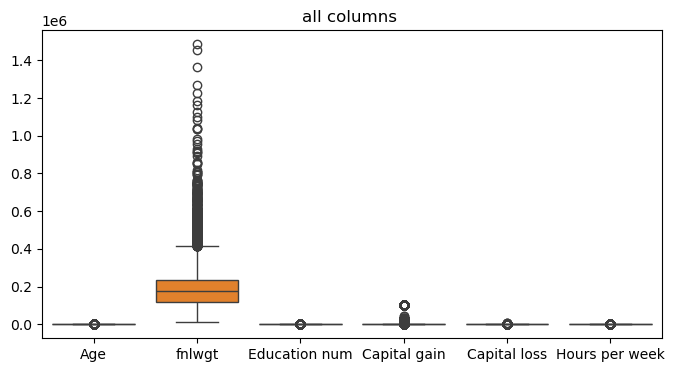

In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(df)
plt.title('all columns ')
plt.show()

In [34]:
def handling_outliers(data):
    # Ensure data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a Pandas DataFrame")

    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        # Example logic to handle outliers (replace with your logic)
        df[col] = df[col].clip(lower=q1 - 1.5 * iqr, upper=q3 + 1.5 * iqr)
    return df

# Call the function
df1 = handling_outliers(data)
print(df1)

       Age         Work Class  fnlwgt    Education  Education num  \
0       39          State-gov   77516    Bachelors           13.0   
1       50   Self-emp-not-inc   83311    Bachelors           13.0   
2       38            Private  215646      HS-grad            9.0   
3       53            Private  234721         11th            7.0   
4       28            Private  338409    Bachelors           13.0   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm           12.0   
32557   40            Private  154374      HS-grad            9.0   
32558   58            Private  151910      HS-grad            9.0   
32559   22            Private  201490      HS-grad            9.0   
32560   52       Self-emp-inc  287927      HS-grad            9.0   

            Marital status          Occupation     Relationsip    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [38]:
df1 = handling_outliers(df)
df1.head()

,Age,Work Class,fnlwgt,Education,Education num,Marital status,Occupation,Relationsip,Race,Sex,Capital gain,Capital loss,Hours per week,Native Country,Income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [40]:
df1.shape

(32537, 15)

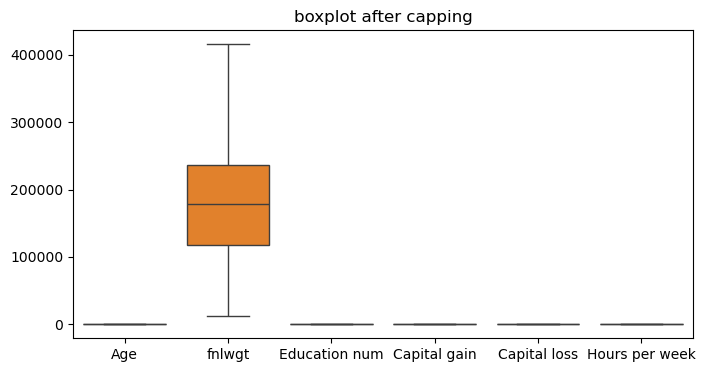

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(df1)
plt.title('boxplot after capping')
plt.show()

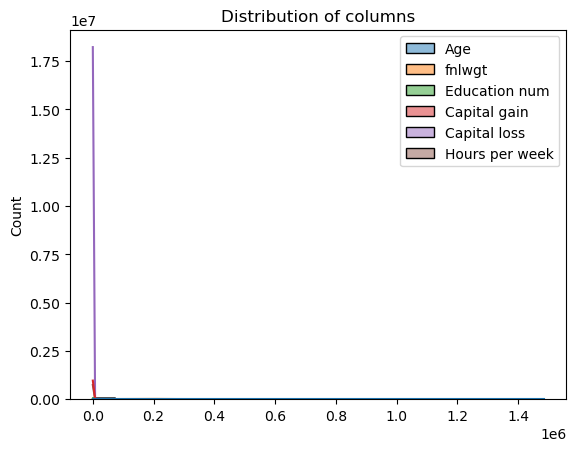

In [45]:
# Histogram for hours-per-week
sns.histplot(data=data, kde=True, bins=20)
plt.title("Distribution of columns")
plt.show()

In [59]:
numerical_columns = ['Age', 'fnlwgt', 'Education num', 'Capital gain', 'Capital loss', 'Hours per week']
from scipy.stats import skew

for col in numerical_columns:
    skewness_value = skew(data[col].dropna()) 
    
    # Drop NaN values for accurate calculation
    
    print(f'Skewness of {col}: {skewness_value:.4f}')

Skewness of Age: 0.5587
Skewness of fnlwgt: 1.4469
Skewness of Education num: -0.3117
Skewness of Capital gain: 11.9533
Skewness of Capital loss: 4.5944
Skewness of Hours per week: 0.2276


In [ ]:
# CORRELATION HEATMAP

In [61]:
df_encoded=pd.get_dummies(df1,drop_first=True)
df_encoded

,Age,fnlwgt,Education num,Capital gain,Capital loss,Hours per week,Work Class_ Federal-gov,Work Class_ Local-gov,Work Class_ Never-worked,Work Class_ Private,...,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia,Income_ >50K
0,39,77516,13.0,0,0,40.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13.0,0,0,32.5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12.0,0,0,38.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32557,40,154374,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
32558,58,151910,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32559,22,201490,9.0,0,0,32.5,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [63]:
corr_matrix=df_encoded.corr()
corr_matrix

,Age,fnlwgt,Education num,Capital gain,Capital loss,Hours per week,Work Class_ Federal-gov,Work Class_ Local-gov,Work Class_ Never-worked,Work Class_ Private,...,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia,Income_ >50K
Age,1.000000,-0.077169,0.047012,NaN,NaN,0.091242,0.051676,0.061139,-0.019468,-0.198822,...,0.008065,0.002631,0.000147,-0.013845,-0.006275,0.004915,0.015677,-0.015081,0.000413,0.235830
fnlwgt,-0.077169,1.000000,-0.039794,NaN,NaN,-0.025753,-0.008770,-0.001244,0.005014,0.043132,...,0.008508,-0.003610,-0.012184,-0.000900,-0.000658,0.002717,-0.077752,-0.011243,0.004731,-0.008420
Education num,0.047012,-0.039794,1.000000,NaN,NaN,0.184978,0.060361,0.100373,-0.015658,-0.120959,...,-0.038865,0.000975,0.016020,0.051053,0.007837,-0.017266,0.076595,-0.006309,-0.001411,0.342360
Capital gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capital loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Native Country_ Trinadad&Tobago,0.004915,0.002717,-0.017266,NaN,NaN,-0.004392,-0.004215,-0.001152,-0.000355,0.002104,...,-0.001433,-0.000464,-0.001200,-0.000958,-0.000569,1.000000,-0.070948,-0.001098,-0.000536,-0.007668
Native Country_ United-States,0.015677,-0.077752,0.076595,NaN,NaN,0.017456,0.015377,0.033110,0.004998,-0.042912,...,-0.174041,-0.056378,-0.145719,-0.116296,-0.069055,-0.070948,1.000000,-0.133328,-0.065104,0.034206
Native Country_ Vietnam,-0.015081,-0.011243,-0.006309,NaN,NaN,-0.013929,0.000093,-0.003620,-0.000666,0.009311,...,-0.002694,-0.000873,-0.002255,-0.001800,-0.001069,-0.001098,-0.133328,1.000000,-0.001008,-0.017665
Native Country_ Yugoslavia,0.000413,0.004731,-0.001411,NaN,NaN,0.007337,-0.003867,-0.000165,-0.000325,0.005582,...,-0.001315,-0.000426,-0.001101,-0.000879,-0.000522,-0.000536,-0.065104,-0.001008,1.000000,0.006954


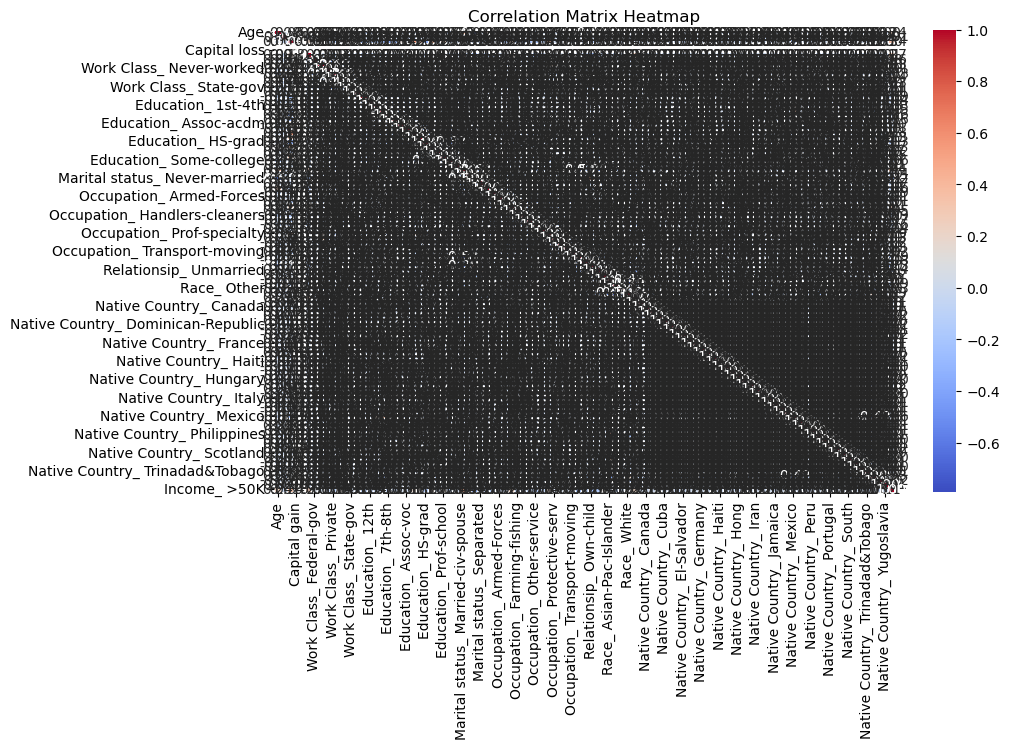

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#VISUALISATION DISTRIBUTION  OF NUMERICAL FEATURES

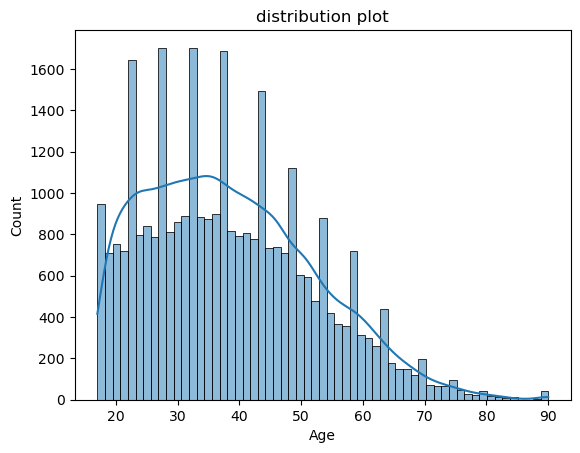

In [69]:
sns.histplot(data=data,x=data.Age,kde=True)
plt.title('distribution plot')
plt.show()

In [ ]:
#SCATTER PLOT

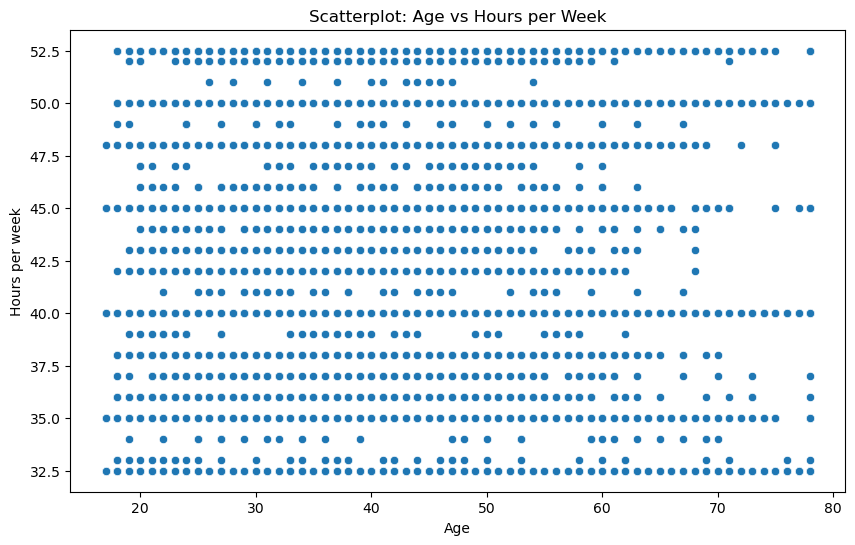

In [77]:
# Scatter plot of age vs hours-per-week


plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Hours per week', data=df_encoded)
plt.title("Scatterplot: Age vs Hours per Week")
plt.show()

In [ ]:
#COUNTPLOT FOR CATEGORICAL VARIABLES

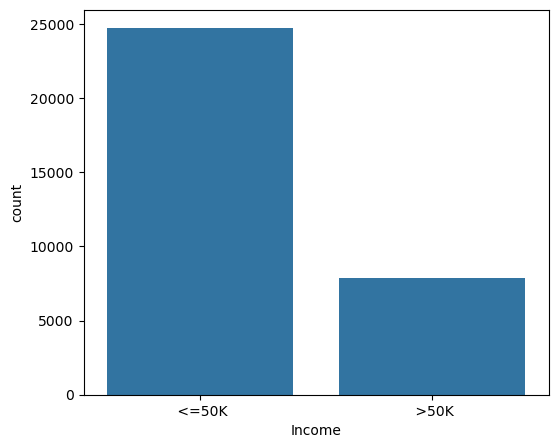

In [79]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Income',data=data)
plt.show()

In [85]:
import pandas as pd
from scipy.stats import kurtosis
for col in numerical_columns:
    kurtosis_value = kurtosis(data[col].dropna(), fisher=True)  
    
    # Drop NaN values for accurate calculation
    print(f'Kurtosis of {col}: {kurtosis_value:.4f}')

Kurtosis of Age: -0.1663
Kurtosis of fnlwgt: 6.2177
Kurtosis of Education num: 0.6232
Kurtosis of Capital gain: 154.7755
Kurtosis of Capital loss: 20.3735
Kurtosis of Hours per week: 2.9161


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

In [89]:
# Features and target
X = df.drop(columns=['Income'])  # Features
y = df['Income']

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [91]:
# Step 2: Feature Selection (on Training Set)

# Encode categorical features for Chi-Square

le = LabelEncoder()
categorical_features = X_train.select_dtypes(include='object').columns
for col in categorical_features:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Apply same transformation to test set

In [93]:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Apply same transformation to test set
# Select top 5 features
feature_selector = SelectKBest(chi2, k=5)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)


# Get selected feature names
selected_features = X_train.columns[feature_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Scaling (on Selected Features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Final Training and Testing Sets
print("Final Training Set Shape:", X_train_scaled.shape)
print("Final Testing Set Shape:", X_test_scaled.shape)

Selected Features: Index(['Age', 'fnlwgt', 'Education num', 'Relationsip', 'Hours per week'], dtype='object')
Final Training Set Shape: (26029, 5)
Final Testing Set Shape: (6508, 5)


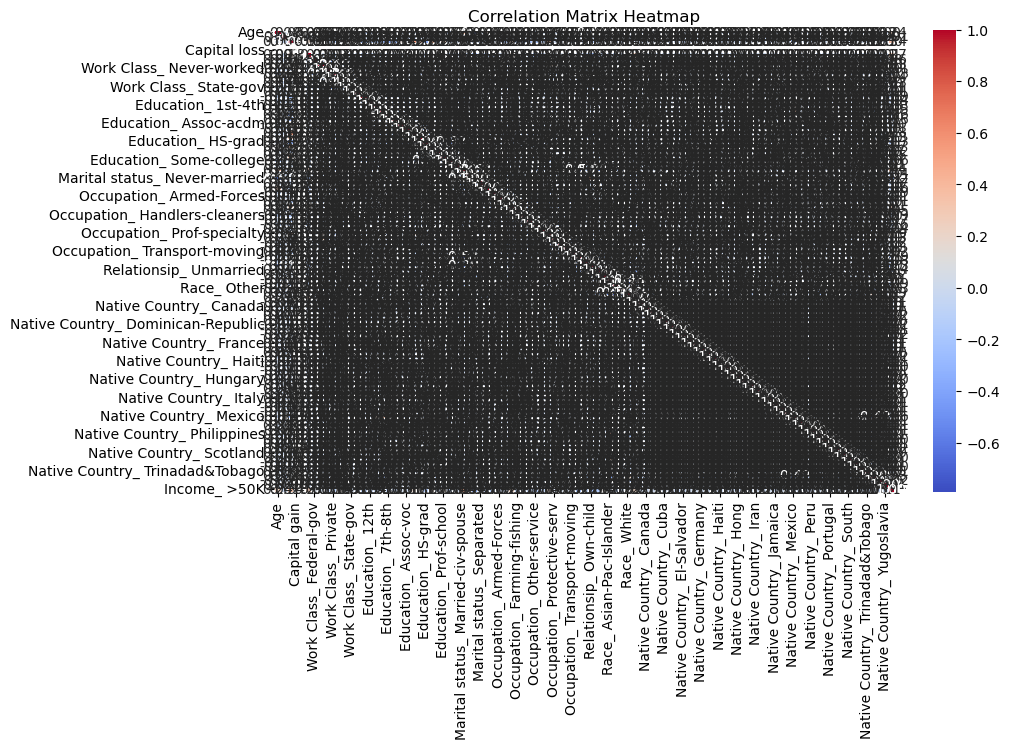

In [97]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()